In [1]:
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

timesteps = seq_length = 7
data_dim = 5

xy = np.loadtxt('stock.csv', delimiter=',')
xy = xy[::-1]  

scaler = MinMaxScaler(feature_range=(0, 1))
xy = scaler.fit_transform(xy)

x = xy
y = xy[:, [-1]]  

dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]   
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])



Using TensorFlow backend.


[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.3641

 [0.23723899 0.240697   0.2555855  0.12868155 0.24641792]] -> [0.24426121]
[[0.28223302 0.29049908 0.29913189 0.33420274 0.30173448]
 [0.28899382 0.28318331 0.28140806 0.15072152 0.27634948]
 [0.26868234 0.2626643  0.27418952 0.13117325 0.25816326]
 [0.2529752  0.27069971 0.27278097 0.15418123 0.2781564 ]
 [0.27072216 0.26593044 0.25417696 0.17191001 0.24047238]
 [0.23723899 0.240697   0.2555855  0.12868155 0.24641792]
 [0.22467906 0.23763324 0.24534441 0.11423322 0.24426121]] -> [0.24717565]
[[0.28899382 0.28318331 0.28140806 0.15072152 0.27634948]
 [0.26868234 0.2626643  0.27418952 0.13117325 0.25816326]
 [0.2529752  0.27069971 0.27278097 0.15418123 0.2781564 ]
 [0.27072216 0.26593044 0.25417696 0.17191001 0.24047238]
 [0.23723899 0.240697   0.2555855  0.12868155 0.24641792]
 [0.22467906 0.23763324 0.24534441 0.11423322 0.24426121]
 [0.23977427 0.24243134 0.25027423 0.14464462 0.24717565]] -> [0.22068331]
[[0.26868234 0.2626643  0.27418952 0.13117325 0.25816326]
 [0.2529752  0.270699

 [0.1626591  0.1667817  0.17413425 0.15155508 0.16474746]] -> [0.13053183]
[[0.11583649 0.13036959 0.12967071 0.14211706 0.13644068]
 [0.13506965 0.15892701 0.15455436 0.37437483 0.15869256]
 [0.20821428 0.21725575 0.20449766 0.44139105 0.21132781]
 [0.20030955 0.20224708 0.19260611 0.21422425 0.1830793 ]
 [0.17481108 0.17354534 0.18429013 0.13293    0.17815387]
 [0.1626591  0.1667817  0.17413425 0.15155508 0.16474746]
 [0.15508248 0.15206962 0.13934709 0.18591915 0.13053183]] -> [0.13216392]
[[0.13506965 0.15892701 0.15455436 0.37437483 0.15869256]
 [0.20821428 0.21725575 0.20449766 0.44139105 0.21132781]
 [0.20030955 0.20224708 0.19260611 0.21422425 0.1830793 ]
 [0.17481108 0.17354534 0.18429013 0.13293    0.17815387]
 [0.1626591  0.1667817  0.17413425 0.15155508 0.16474746]
 [0.15508248 0.15206962 0.13934709 0.18591915 0.13053183]
 [0.12757327 0.12591127 0.13069064 0.15777539 0.13216392]] -> [0.14055755]
[[0.20821428 0.21725575 0.20449766 0.44139105 0.21132781]
 [0.20030955 0.202247

 [0.4218112  0.42665849 0.39449125 0.31221655 0.42276376]] -> [0.40169233]
[[0.46861183 0.48273232 0.45581982 0.25521197 0.44963509]
 [0.42291858 0.41642633 0.36611587 0.38158107 0.34952358]
 [0.22831412 0.29872895 0.22737841 0.51648293 0.28287009]
 [0.35044446 0.35110315 0.27450451 0.31640226 0.26086602]
 [0.33715612 0.39232041 0.32714725 0.37895492 0.39656287]
 [0.4218112  0.42665849 0.39449125 0.31221655 0.42276376]
 [0.4026363  0.40726378 0.40200325 0.17664247 0.40169233]] -> [0.36634002]
[[0.42291858 0.41642633 0.36611587 0.38158107 0.34952358]
 [0.22831412 0.29872895 0.22737841 0.51648293 0.28287009]
 [0.35044446 0.35110315 0.27450451 0.31640226 0.26086602]
 [0.33715612 0.39232041 0.32714725 0.37895492 0.39656287]
 [0.4218112  0.42665849 0.39449125 0.31221655 0.42276376]
 [0.4026363  0.40726378 0.40200325 0.17664247 0.40169233]
 [0.3872497  0.40414209 0.38181472 0.19438917 0.36634002]] -> [0.30671028]
[[0.22831412 0.29872895 0.22737841 0.51648293 0.28287009]
 [0.35044446 0.351103

 [0.70756897 0.7197748  0.73329456 0.11309492 0.72336032]] -> [0.71552044]
[[0.67685412 0.68303764 0.6960573  0.15354486 0.68716288]
 [0.6752514  0.69800993 0.69529433 0.14488662 0.70977905]
 [0.70462569 0.71419633 0.7290103  0.16607511 0.71470448]
 [0.72039096 0.71110357 0.71677399 0.26645156 0.71417973]
 [0.70477136 0.71254878 0.72172128 0.1638971  0.72726576]
 [0.70756897 0.7197748  0.73329456 0.11309492 0.72336032]
 [0.72184801 0.72185581 0.72945053 0.1276508  0.71552044]] -> [0.70747652]
[[0.6752514  0.69800993 0.69529433 0.14488662 0.70977905]
 [0.70462569 0.71419633 0.7290103  0.16607511 0.71470448]
 [0.72039096 0.71110357 0.71677399 0.26645156 0.71417973]
 [0.70477136 0.71254878 0.72172128 0.1638971  0.72726576]
 [0.70756897 0.7197748  0.73329456 0.11309492 0.72336032]
 [0.72184801 0.72185581 0.72945053 0.1276508  0.71552044]
 [0.69168703 0.69881069 0.71433841 0.14224254 0.70747652]] -> [0.70231806]
[[0.70462569 0.71419633 0.7290103  0.16607511 0.71470448]
 [0.72039096 0.711103

 [0.73528203 0.77589503 0.76120034 0.20913328 0.77506266]] -> [0.79252019]
[[0.84144327 0.86612487 0.85868045 0.1203639  0.86838345]
 [0.83136038 0.85338971 0.8336795  0.23257148 0.85322827]
 [0.86408579 0.85322494 0.77648851 0.42414628 0.7869245 ]
 [0.76317009 0.76538554 0.77120666 0.21386573 0.76203515]
 [0.76043082 0.75691649 0.7041854  0.32480057 0.70974988]
 [0.73528203 0.77589503 0.76120034 0.20913328 0.77506266]
 [0.75926528 0.7815139  0.77158815 0.13061755 0.79252019]] -> [0.81219274]
[[0.83136038 0.85338971 0.8336795  0.23257148 0.85322827]
 [0.86408579 0.85322494 0.77648851 0.42414628 0.7869245 ]
 [0.76317009 0.76538554 0.77120666 0.21386573 0.76203515]
 [0.76043082 0.75691649 0.7041854  0.32480057 0.70974988]
 [0.73528203 0.77589503 0.76120034 0.20913328 0.77506266]
 [0.75926528 0.7815139  0.77158815 0.13061755 0.79252019]
 [0.79341859 0.79983917 0.81184772 0.11464551 0.81219274]] -> [0.78103725]
[[0.86408579 0.85322494 0.77648851 0.42414628 0.7869245 ]
 [0.76317009 0.765385

In [2]:
# 모델링 해보세요. 

model = Sequential()
model.add(LSTM(1, input_shape=(seq_length, data_dim), return_sequences=False))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 28        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 학습 시켜 보세요.
print(trainX.shape, trainY.shape)
history = model.fit(trainX, trainY
                    , epochs=200
                    , validation_split=0.2)

(507, 7, 5) (507, 1)
Train on 405 samples, validate on 102 samples
Epoch 1/200
405/405 [==============================] - 5s 12ms/step - loss: 0.0207 - mean_absolute_error: 0.1133 - val_loss: 0.1641 - val_mean_absolute_error: 0.3998
Epoch 2/200
405/405 [==============================] - 0s 990us/step - loss: 0.0128 - mean_absolute_error: 0.0783 - val_loss: 0.1356 - val_mean_absolute_error: 0.3622
Epoch 3/200
405/405 [==============================] - 0s 1ms/step - loss: 0.0085 - mean_absolute_error: 0.0566 - val_loss: 0.1147 - val_mean_absolute_error: 0.3318
Epoch 4/200
405/405 [==============================] - 0s 948us/step - loss: 0.0068 - mean_absolute_error: 0.0527 - val_loss: 0.1012 - val_mean_absolute_error: 0.3108
Epoch 5/200
405/405 [==============================] - 0s 975us/step - loss: 0.0063 - mean_absolute_error: 0.0536 - val_loss: 0.0932 - val_mean_absolute_error: 0.2977
Epoch 6/200
405/405 [==============================] - 0s 970us/step - loss: 0.0059 - mean_absolute_e

405/405 [==============================] - 0s 955us/step - loss: 0.0019 - mean_absolute_error: 0.0294 - val_loss: 0.0081 - val_mean_absolute_error: 0.0789
Epoch 50/200
405/405 [==============================] - 0s 960us/step - loss: 0.0019 - mean_absolute_error: 0.0293 - val_loss: 0.0080 - val_mean_absolute_error: 0.0782
Epoch 51/200
405/405 [==============================] - 0s 975us/step - loss: 0.0019 - mean_absolute_error: 0.0295 - val_loss: 0.0071 - val_mean_absolute_error: 0.0732
Epoch 52/200
405/405 [==============================] - 0s 963us/step - loss: 0.0019 - mean_absolute_error: 0.0291 - val_loss: 0.0073 - val_mean_absolute_error: 0.0743
Epoch 53/200
405/405 [==============================] - 0s 1ms/step - loss: 0.0019 - mean_absolute_error: 0.0290 - val_loss: 0.0066 - val_mean_absolute_error: 0.0703
Epoch 54/200
405/405 [==============================] - 0s 1ms/step - loss: 0.0019 - mean_absolute_error: 0.0289 - val_loss: 0.0065 - val_mean_absolute_error: 0.0696
Epoch 55/

405/405 [==============================] - 0s 992us/step - loss: 0.0016 - mean_absolute_error: 0.0268 - val_loss: 0.0024 - val_mean_absolute_error: 0.0381
Epoch 99/200
405/405 [==============================] - 0s 951us/step - loss: 0.0016 - mean_absolute_error: 0.0267 - val_loss: 0.0023 - val_mean_absolute_error: 0.0375
Epoch 100/200
405/405 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_absolute_error: 0.0267 - val_loss: 0.0024 - val_mean_absolute_error: 0.0378
Epoch 101/200
405/405 [==============================] - 0s 948us/step - loss: 0.0016 - mean_absolute_error: 0.0267 - val_loss: 0.0023 - val_mean_absolute_error: 0.0377
Epoch 102/200
405/405 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_absolute_error: 0.0266 - val_loss: 0.0023 - val_mean_absolute_error: 0.0370
Epoch 103/200
405/405 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_absolute_error: 0.0265 - val_loss: 0.0023 - val_mean_absolute_error: 0.0366
Epoch 1

Epoch 147/200
405/405 [==============================] - 0s 943us/step - loss: 0.0014 - mean_absolute_error: 0.0254 - val_loss: 0.0021 - val_mean_absolute_error: 0.0329
Epoch 148/200
405/405 [==============================] - 0s 970us/step - loss: 0.0014 - mean_absolute_error: 0.0254 - val_loss: 0.0021 - val_mean_absolute_error: 0.0329
Epoch 149/200
405/405 [==============================] - 0s 951us/step - loss: 0.0014 - mean_absolute_error: 0.0253 - val_loss: 0.0021 - val_mean_absolute_error: 0.0328
Epoch 150/200
405/405 [==============================] - 0s 1ms/step - loss: 0.0014 - mean_absolute_error: 0.0253 - val_loss: 0.0021 - val_mean_absolute_error: 0.0328
Epoch 151/200
405/405 [==============================] - 0s 985us/step - loss: 0.0014 - mean_absolute_error: 0.0254 - val_loss: 0.0021 - val_mean_absolute_error: 0.0328
Epoch 152/200
405/405 [==============================] - 0s 968us/step - loss: 0.0014 - mean_absolute_error: 0.0253 - val_loss: 0.0021 - val_mean_absolute_er

405/405 [==============================] - 0s 970us/step - loss: 0.0013 - mean_absolute_error: 0.0240 - val_loss: 0.0020 - val_mean_absolute_error: 0.0311
Epoch 196/200
405/405 [==============================] - 0s 1ms/step - loss: 0.0013 - mean_absolute_error: 0.0241 - val_loss: 0.0020 - val_mean_absolute_error: 0.0315
Epoch 197/200
405/405 [==============================] - 0s 980us/step - loss: 0.0013 - mean_absolute_error: 0.0239 - val_loss: 0.0021 - val_mean_absolute_error: 0.0317
Epoch 198/200
405/405 [==============================] - 0s 973us/step - loss: 0.0013 - mean_absolute_error: 0.0239 - val_loss: 0.0020 - val_mean_absolute_error: 0.0310
Epoch 199/200
405/405 [==============================] - 0s 983us/step - loss: 0.0013 - mean_absolute_error: 0.0241 - val_loss: 0.0020 - val_mean_absolute_error: 0.0312
Epoch 200/200
405/405 [==============================] - 0s 936us/step - loss: 0.0013 - mean_absolute_error: 0.0239 - val_loss: 0.0020 - val_mean_absolute_error: 0.0312


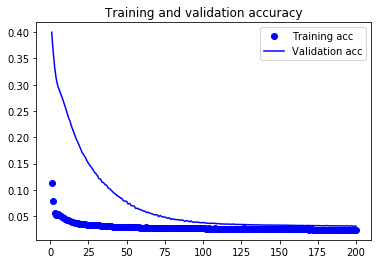

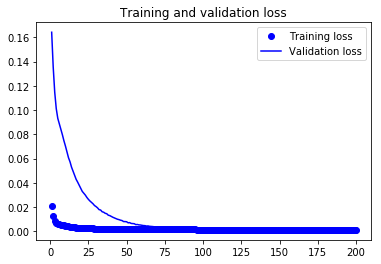

In [18]:
#학습 결과에 대해 시각화 해보세요. loss에 대해 시각화하세요. 

mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, mae, 'bo', label='Training acc')
plt.plot(epochs, val_mae, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

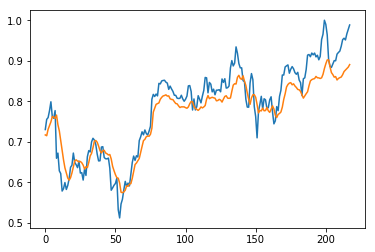

In [6]:
testPredict = model.predict(testX)

plt.plot(testY)
plt.plot(testPredict)
plt.show()

In [15]:
# model.evaluate(x값, y값) 함수를 사용하여 모델을 평가해보세요.

model.evaluate(testX, testY)

218/218 [==============================] - 0s 1ms/step


[0.0019302517261116877, 0.03580697229422561]

In [17]:
model.metrics_names

['loss', 'mean_absolute_error']

In [10]:
testX[0:1]

array([[[0.71089093, 0.73520966, 0.73194468, 0.14061128, 0.75005662],
        [0.74428671, 0.74231996, 0.74787833, 0.10095008, 0.73659187],
        [0.70914253, 0.71341586, 0.72716163, 0.10077978, 0.71476265],
        [0.70264412, 0.72335888, 0.72771917, 0.09373487, 0.73775772],
        [0.73061952, 0.72555562, 0.72983201, 0.12954199, 0.72199061],
        [0.72653969, 0.72107552, 0.72768979, 0.11498611, 0.71869727],
        [0.72377143, 0.7197748 , 0.72915698, 0.10864928, 0.70980805]]])

In [12]:
# model.predict(새로운 x값) 을 사용하여 예측해보세요.
# test 데이터의 0번째 데이터를 사용해서 예측해보세요.

model.predict(testX[0:1])

array([[0.71698743]], dtype=float32)